# Data Analysis and Visualization

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pl.read_csv("../data/iris.csv")

## Exploratory Data Analysis
Let's first understand our data through statistical analysis and visualizations.

In [3]:
# Display the first few rows
print("First 5 rows:")
df.head(5)

# Display data types and shape
print("\nDataFrame Info:")
print(df.schema)
print(f"\nShape: {df.shape}")

# Display summary statistics
print("\nSummary Statistics:")
df.describe()

First 5 rows:

DataFrame Info:
Schema({'Id': Int64, 'SepalLengthCm': Float64, 'SepalWidthCm': Float64, 'PetalLengthCm': Float64, 'PetalWidthCm': Float64, 'Species': String})

Shape: (150, 6)

Summary Statistics:


statistic,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
str,f64,f64,f64,f64,f64,str
"""count""",150.0,150.0,150.0,150.0,150.0,"""150"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",75.5,5.843333,3.054,3.758667,1.198667,null
"""std""",43.445368,0.828066,0.433594,1.76442,0.763161,null
"""min""",1.0,4.3,2.0,1.0,0.1,"""Iris-setosa"""
"""25%""",38.0,5.1,2.8,1.6,0.3,null
"""50%""",76.0,5.8,3.0,4.4,1.3,null
"""75%""",113.0,6.4,3.3,5.1,1.8,null
"""max""",150.0,7.9,4.4,6.9,2.5,"""Iris-virginica"""


In [4]:
# Basic statistics
df.describe()

statistic,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
str,f64,f64,f64,f64,f64,str
"""count""",150.0,150.0,150.0,150.0,150.0,"""150"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",75.5,5.843333,3.054,3.758667,1.198667,null
"""std""",43.445368,0.828066,0.433594,1.76442,0.763161,null
"""min""",1.0,4.3,2.0,1.0,0.1,"""Iris-setosa"""
"""25%""",38.0,5.1,2.8,1.6,0.3,null
"""50%""",76.0,5.8,3.0,4.4,1.3,null
"""75%""",113.0,6.4,3.3,5.1,1.8,null
"""max""",150.0,7.9,4.4,6.9,2.5,"""Iris-virginica"""


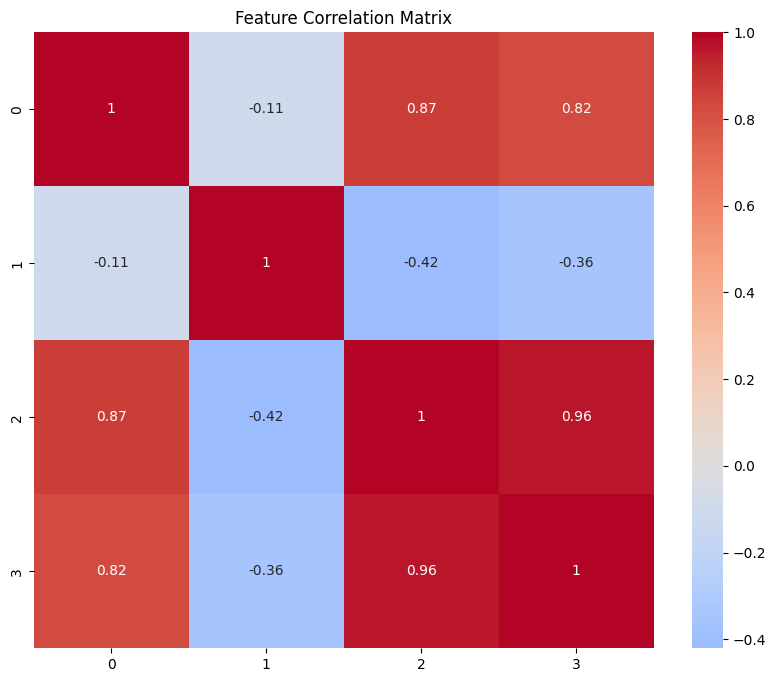

In [5]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.select(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']).corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

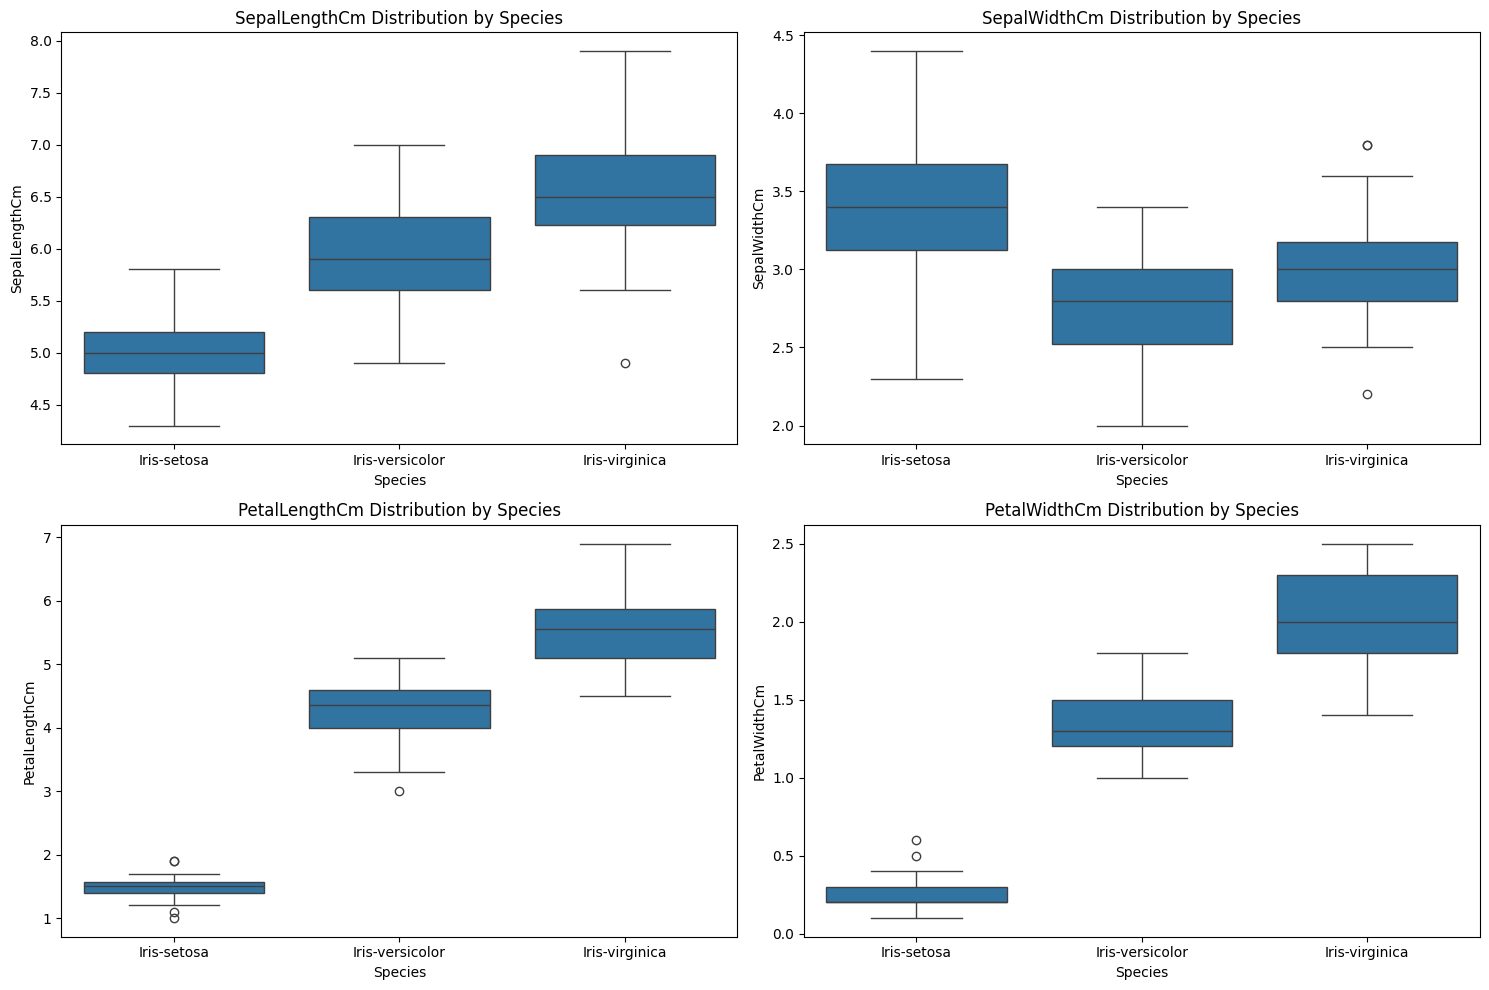

In [6]:
# Feature Distribution by Species
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Species', y=feature, data=df.to_pandas())
    plt.title(f'{feature} Distribution by Species')
plt.tight_layout()
plt.show()

In [7]:
# Encode categorical variables
cleaned_df = df.with_columns(pl.col("Species").cast(pl.Categorical).cast(pl.UInt32).alias("species_encoded"))

In [8]:
# Create mapping dictionary for reference
species_categories = cleaned_df.select(pl.col('Species', 'species_encoded')).unique().sort("Species")
species_map = {row[0]: row[1] for row in zip(species_categories['Species'], species_categories['species_encoded'])}
print('Species Mapping:', species_map)

Species Mapping: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


## Data Preprocessing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare features and target
X = cleaned_df.drop('Species', 'species_encoded').to_numpy()
y = cleaned_df.select('species_encoded').to_numpy().flatten()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Scale the features
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

print('Data shapes:', X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

Data shapes: (120, 5) (30, 5) (120,) (30,)


## Model Building and Training

In [10]:
import os 
os.environ['KERAS_BACKEND'] = 'jax'
import keras

# Verify backend
print('Keras Backend:', keras.backend.backend())

Keras Backend: jax


In [11]:
def iris_model(input_shape) -> keras.Model:
    inputs = keras.Input(input_shape)
    x = keras.layers.Dense(128, activation="relu")(inputs)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.Dense(64, activation="relu")(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(32, activation="relu")(x)
    x = keras.layers.Dense(3, activation="softmax")(x)
    
    model = keras.Model(inputs=inputs, outputs=x)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )
    return model

# Create and display model
model = iris_model((X_train.shape[1],))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,203 (43.76 KB)

 Trainable params: 11,203 (43.76 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model with early stopping
hist = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 0.2539 - loss: 1.1011 - val_accuracy: 0.2500 - val_loss: 1.0631
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4948 - loss: 1.0182 - val_accuracy: 0.7083 - val_loss: 1.0019
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6055 - loss: 0.9599 - val_accuracy: 0.8333 - val_loss: 0.9483
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6367 - loss: 0.8922 - val_accuracy: 0.8333 - val_loss: 0.8954
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7448 - loss: 0.8440 - val_accuracy: 0.8333 - val_loss: 0.8367
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8229 - loss: 0.7497 - val_accuracy: 0.8333 - val_loss: 0.7725
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.7227 - val_accuracy: 0.8750 - val_loss: 0.7101
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7591 - loss: 0.6434 - val_accuracy: 0.8750 - val_loss: 0.64

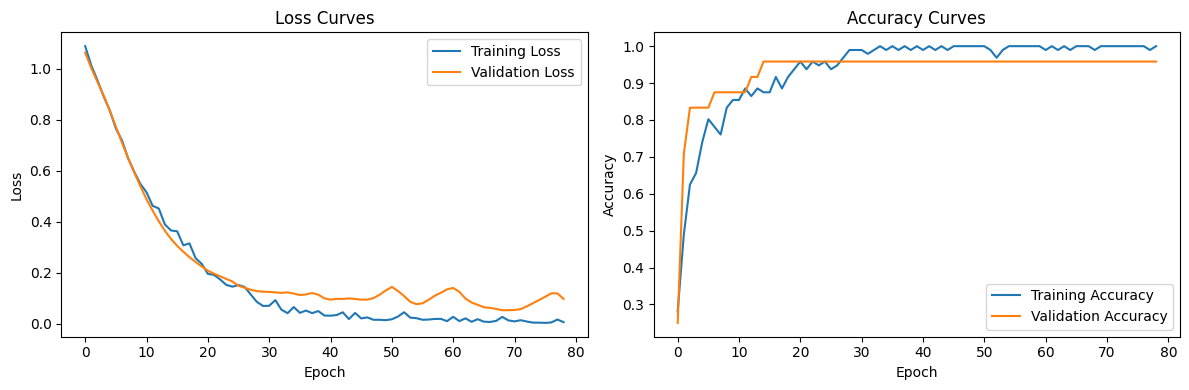

In [13]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 1.0000 - loss: 0.0010
Test Loss: 0.0010
Test Accuracy: 1.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


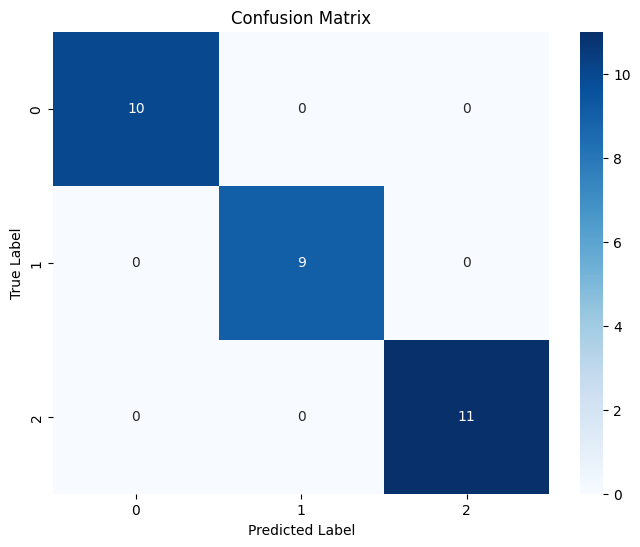

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Get predictions
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

In [16]:
model.save('iris_keras_model.h5')
print('Model saved as iris_keras_model.h5')

Model saved as iris_keras_model.h5
